# RLab1:  Exploratory data Analysis

Machine learning projects start with managing and understanding data. Data scientists spend most of their time as a data janitor to do all kind of data cleaning. In this lab, we will use R to first import data into R environment and then,  write codes to manage and understand our data. Most of you will start using R for the first time, so we will go slowly in this lab. If you need help, feel free to reach out to me or post your questions on Week 1 discussion forum in Coursera to get some help from your instructor, course TA, or your peers. 

## Data
In this lab, we will use one of the publicly available data in UCI machine learning repository on credit default data.


*LIMIT_BAL*: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

*SEX*: Gender (1 = male; 2 = female).

*EDUCATION*: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others, 5=unknown, 6=unknown).

*MARRIAGE*: Marital status (1 = married; 2 = single; 3 = others, 0=unknown).

*AGE*: Age (year).

PAY data scale: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

*PAY_0*: History of past monthly payment records (repayment status in September)

*PAY_2*: History of past monthly payment records (repayment status in August)

*PAY_3*: History of past monthly payment records (repayment status in July)

*PAY_4*: History of past monthly payment records (repayment status in June)

*PAY_5*: History of past monthly payment records (repayment status in May)

*PAY_6*: History of past monthly payment records (repayment status in April)

*BILL_AMT1*:  amount of bill statement in September

*BILL_AMT2*:  amount of bill statement in August

*BILL_AMT3*:  amount of bill statement in July

*BILL_AMT4*:  amount of bill statement in June

*BILL_AMT5*:  amount of bill statement in May

*BILL_AMT6*:  amount of bill statement in April

*PAY_AMT1*: Amount of previous payment (NT dollar) paid in September

*PAY_AMT2*: Amount of previous payment (NT dollar) paid in August

*PAY_AMT3*: Amount of previous payment (NT dollar) paid in July

*PAY_AMT4*: Amount of previous payment (NT dollar) paid in June

*PAY_AMT5*: Amount of previous payment (NT dollar) paid in May

*PAY_AMT6*: Amount of previous payment (NT dollar) paid in April

*default*:  default payment (Yes = 1, No = 0)


Let's first call the necessary packages and import our data into R environment. Our tabular data is called **defaultCC** and it is stored as a csv file. We will rename our dataset as **creditdata**.

In [1]:
# call the necessary libraries
library(ggplot2)
library(dplyr)
library(testthat)
# call the data and name it as mydata, headers are in the first row
creditdata<-read.csv("defaultCC.csv", header=TRUE, stringsAsFactors=FALSE)
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#
creditdata<-rename(creditdata, default=default.payment.next.month)

str(creditdata)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches




'data.frame':	30000 obs. of  25 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL: int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX      : int  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION: int  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE : int  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE      : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0    : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2    : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3    : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4    : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5    : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6    : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1: int  3913 2682 29239 46990 8617 64400 367965 11876 11285 0 ...
 $ BILL_AMT2: int  3102 1725 14027 48233 5670 57069 412023 380 14096 0 ...
 $ BILL_AMT3: int  689 2682 13559 49291 35835 57608 445007 601 12108 0 ...
 $ BILL_AMT4: int  0 3272 14331 28314 20940 19394 542653 221 12211 0 ...
 $ BILL_AMT5: int  0 3455 14948 28959 19146 19619 483003 -159 11793 13

Our raw data, **defaultCC**, is a tabular data where rows store the observations while the columns store variables. Since the data file "defaultCC.csv" is stored in the working directory with our R files, we import the data with *read.csv()* command without the file path. Were it in a different folder, then we would need to write the full file path. We named the raw data as "creditdata". *read.csv()* command assumes that the first row contains the header line, we still added *header=TRUE* option in *read.csv()* to be on the safe side. *stringsAsFactors=FALSE* parameter is added to prevent R to convert every character vector to a factor.  As shown above with the *str()* command, creditdata is a data frame. Data frames are important data structures in R. Data frames have two dimensions and they are displayed in matrix format. Columns are the features, rows are the observations or the examples. 


**Exercie 1**: As a warmup to familiarize yourself with creditdata, complete the following exercise. Write an R code below that will write the dimension of creditdata (number of rows and number of columns) into a list called dimension.

In [2]:
# Exercise #1: Write an R code to get the dimension of creditdata

dimension <-dim(creditdata)

# your code here


print(dimension)

[1] 30000    25


In [3]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check number of dimensions", {
    expect_equal(30000, dimension[1])
    expect_equal(25, dimension[2])
})



### END HIDDEN TEST


As can be seen with the str(creditdata) command, all factor variables ('SEX','EDUCATION','MARRIAGE','default') were coded as integer. We need to declare those variables as factor in R. The following code will do the job. 

In [4]:
#names of the factor variables
col_names<-c('SEX','EDUCATION','MARRIAGE','default')
# declare columns as factor
creditdata[,col_names]<-lapply (creditdata[,col_names],factor)
# You can check to make sure everything is good to go  #str(creditdata)
# Check the number of missing value, if any!   #list(lapply(creditdata, function(x) sum(is.na(x))))
str(creditdata)

'data.frame':	30000 obs. of  25 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL: int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX      : Factor w/ 2 levels "1","2": 2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION: Factor w/ 7 levels "0","1","2","3",..: 3 3 3 3 3 2 2 3 4 4 ...
 $ MARRIAGE : Factor w/ 4 levels "0","1","2","3": 2 3 3 2 2 3 3 3 2 3 ...
 $ AGE      : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0    : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2    : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3    : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4    : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5    : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6    : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1: int  3913 2682 29239 46990 8617 64400 367965 11876 11285 0 ...
 $ BILL_AMT2: int  3102 1725 14027 48233 5670 57069 412023 380 14096 0 ...
 $ BILL_AMT3: int  689 2682 13559 49291 35835 57608 445007 601 12108 0 ...
 $ BILL_AMT4: int  0 3272 14331 28314 20940 19394 54265

## Explore the  Data

For numerical variables, *summary()* function displays common summary statistics. *summary(creditdata)* will display summary statistics of all columns. If you, on the other hand, want to get summary statistics for selected columns, say for "LIMIT_BAL", and "BILL_AMT1, then you can can only limit *summary()* to certain columns, i.e., *summary(creditdata[c("LIMIT_BAL", "BILL_AMT1")])*

Before starting your machine learning modelling, you need to take a look at your data to make sure variables are coded properly.




In [5]:
# Let's look at the first few observations in the data

head(creditdata)

# And the end of the data
tail(creditdata)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
29995,29995,80000,1,2,2,34,2,2,2,2,⋯,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,29996,220000,1,3,1,39,0,0,0,0,⋯,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,⋯,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,⋯,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,⋯,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,⋯,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## Visual Inspection of the data
It is also a good practice to plot the data: scatter plots and histograms for continious variables, bar charts and box-plots for categorical data, to see if there is any pattern or anomaly one can capture with visaulization. 
ggplot2 package in R is a great  package for data visualization. Below, for demonstration purposes, several plots were created to have a better understanding of the data. 


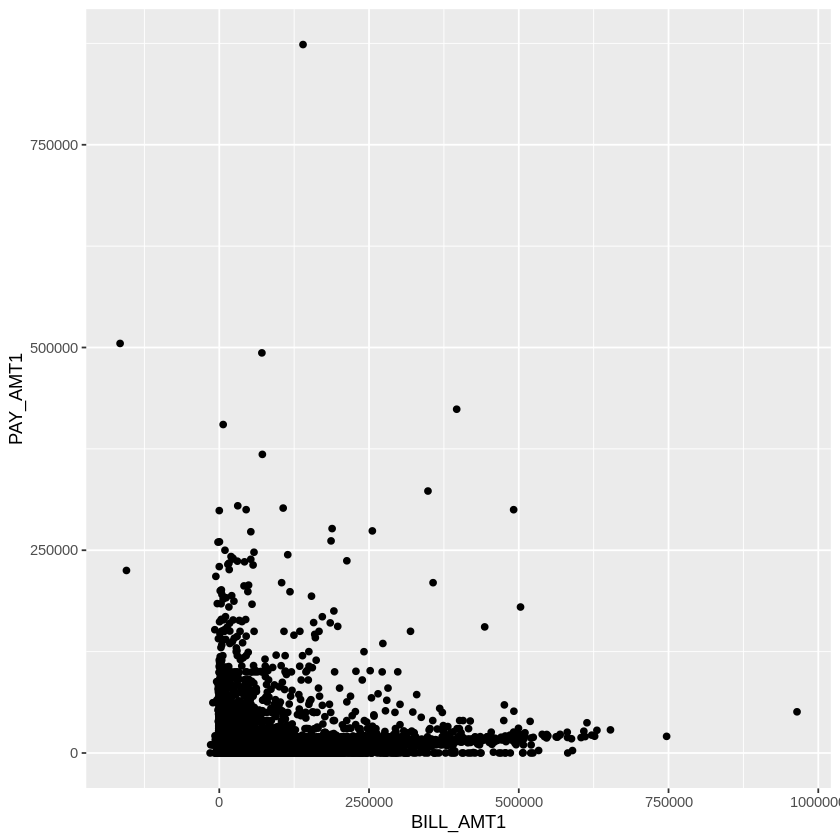

In [6]:
ggplot(data=creditdata) +
geom_point(mapping= aes(x=BILL_AMT1,y=PAY_AMT1))

#ggplot(data=creditdata) creates an empty coordinate system
#geom_point adds a layer of points
# mapping argument in geom_point function helps us to assign the x and y coordinates



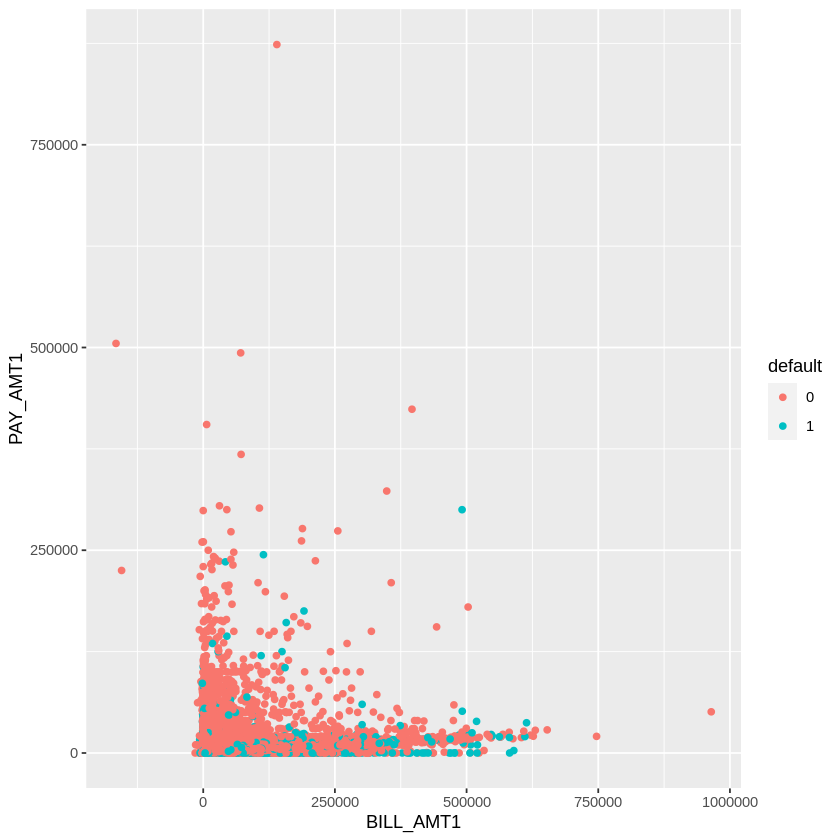

In [7]:
# we can color the points. In here we color based on default variable

ggplot(data=creditdata) +
geom_point(mapping= aes(x=BILL_AMT1,y=PAY_AMT1, color=default))



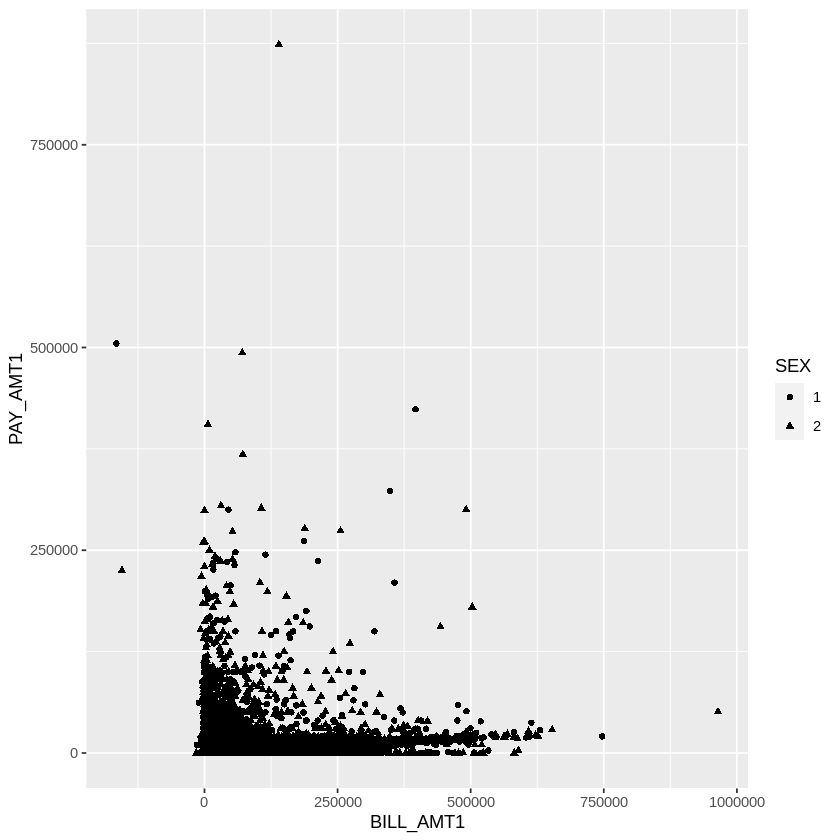

In [8]:
# we can also identify categories with the shape function. In here we indetify male and female customers
ggplot(data=creditdata) +
geom_point(mapping= aes(x=BILL_AMT1,y=PAY_AMT1, shape=SEX))

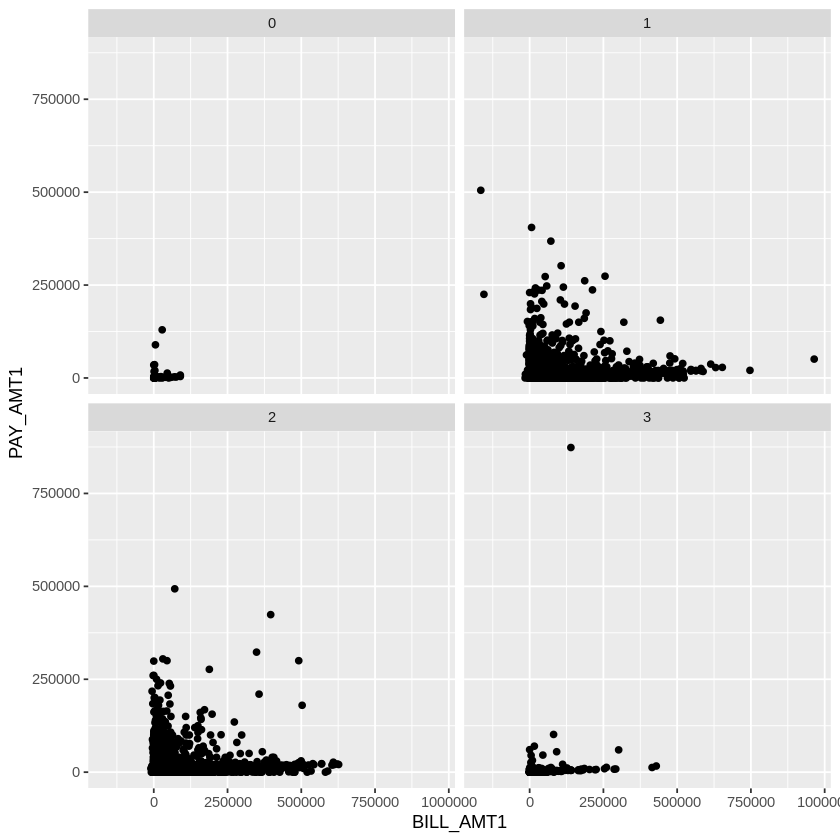

In [9]:
# We can use the facet function in ggplot2 to create separate graphs for each category for a discrete variable
#In here we  look at the relationship based on marital status
ggplot(data=creditdata) +
geom_point(mapping= aes(x=BILL_AMT1,y=PAY_AMT1))+
           facet_wrap(~MARRIAGE, nrow=2)
           

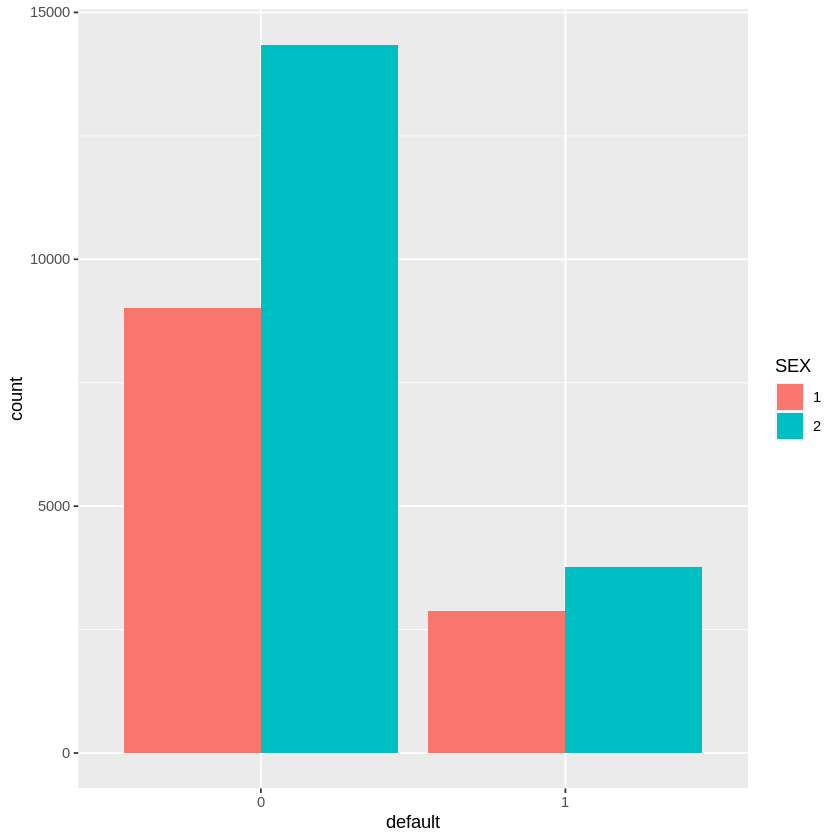

In [10]:
# we can create bar chart with geom_bar
# with fill, we can have a stacked bar graph

ggplot(data=creditdata) +
geom_bar(
    mapping= aes(x=default, fill=SEX), 
       position="dodge"
)
           

## Summary Statistics
Now, you  will look at some of the summary statistics. 

**Exercise 2:** Write an R code to calculate the average LIMIT_BAL and name it mean_balance

**Exercise 3:** Write an R code to calculate the median AGE for female customers (SEX=2) in the data and name it median_age

**Exercise 4:** This time, calculate the interquartile range (you can use the IQR command) for BILL_AMT1 for single (MARRIAGE=2)  males (SEX=1) with college education (EDUCATION=2) and name it BILL_AMT1_IQR.





In [11]:
#Exercise 2: Write an R code to calculate the average LIMIT_BAL and name it mean_balance

mean_balance <- mean(creditdata$LIMIT_BAL)

# your code here

print(mean_balance)


[1] 167484.3


In [12]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the average limit balance", {
    expect_equal(167484.322666667, mean_balance)
})



### END HIDDEN TEST

In [13]:
# Exercise 3: Write an R code to calculate the median AGE for female customers (SEX=2) in the data and name it median_age
# your code here
median_age <- median(creditdata$AGE[creditdata$SEX==1])

print(median_age)

[1] 35


In [14]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the median age for female customers", {
    expect_equal(35, median_age)
})



### END HIDDEN TEST

In [15]:
# Exercise 4: Calculate the interquartile range (you can use the IQR command) for BILL_AMT1 
#for single (MARRIAGE=2)  males (SEX=1) with college education (EDUCATION=2) and name it BILL_AMT1_IQR.

# your code here
BILL_AMT1_IQR <- IQR(creditdata$BILL_AMT1[creditdata$MARRIAGE==2 & creditdata$SEX==1 & creditdata$EDUCATION==2])
                


print(BILL_AMT1_IQR)



[1] 51845


In [16]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the interquartile range", {
    expect_equal(51845, BILL_AMT1_IQR)
})



### END HIDDEN TEST

## Clean the data

This time, we will  drop some observations from the dataset. 

**Exercise 5:** Write an R code to *drop* observations from the **creditdata** for cases where EDUCATION takes the value of 0, 4, 5 or 6. Name the newdataset **creditdata_revised**. There are different ways to do it. You can also use the filter function in R to drop the observations.  Write an R code to calculate the number of people defaulting (default=1) on their loan in **creditdata_revised** and name it *number_default*.


In [17]:
# Exercise 5: Write an R code to calculate the number of people defaulting (default=0) 
# on their loan in creditdata_revised and name it number_default.

                                                      

# your code here



creditdata_revised <- filter(creditdata, creditdata$EDUCATION==1 | creditdata$EDUCATION==2 | creditdata$EDUCATION==3)

number_default<-sum(creditdata_revised$default==1)

print(creditdata_revised)


       ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5
1       1     20000   2         2        1  24     2     2    -1    -1    -2
2       2    120000   2         2        2  26    -1     2     0     0     0
3       3     90000   2         2        2  34     0     0     0     0     0
4       4     50000   2         2        1  37     0     0     0     0     0
5       5     50000   1         2        1  57    -1     0    -1     0     0
6       6     50000   1         1        2  37     0     0     0     0     0
7       7    500000   1         1        2  29     0     0     0     0     0
8       8    100000   2         2        2  23     0    -1    -1     0     0
9       9    140000   2         3        1  28     0     0     2     0     0
10     10     20000   1         3        2  35    -2    -2    -2    -2    -1
11     11    200000   2         3        2  34     0     0     2     0     0
12     12    260000   2         1        2  51    -1    -1    -1    -1    -1

In [18]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the number of default in creditdata_revised", {
    expect_equal(6603, number_default)
})



### END HIDDEN TEST

## Summary

This is the first week of classes and many of you are using R for the first time. It will be challenging for many of you to get used to a new programming environment. Please be patient and just know that there is a steep learning curve for R. I am sure many of you will be very comfortable by the third week of classes. Learning a new script programming is like learning a new language, you have to keep practicing to excel on it. Take advantage of DataCamp and Linkedin resources to learn R. 
